In [7]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [11]:
df_DA_US_exploded = df_DA_US.explode('job_skills')

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [23]:
df_DA_US_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)
df_DA_US_skills = df_DA_US_skills.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})

In [24]:
DA_job_count = len(df_DA_US)

df_DA_US_skills['skill_percent'] = df_DA_US_skills['skill_count'] / DA_job_count * 100

skill_percent_limit = 5

df_DA_US_skills_high_demand = df_DA_US_skills[df_DA_US_skills['skill_percent'] > skill_percent_limit]

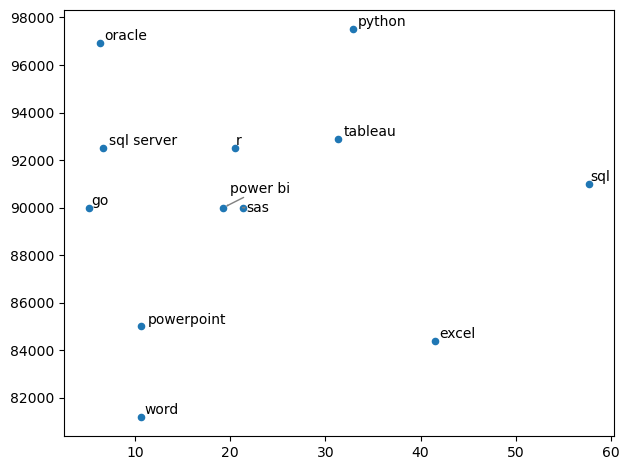

In [28]:
from adjustText import adjust_text

df_DA_US_skills_high_demand.plot(
    kind = 'scatter',
    x = 'skill_percent',
    y = 'median_salary'
)

texts = []
for i, txt in enumerate(df_DA_US_skills_high_demand.index):
    texts.append(plt.text(df_DA_US_skills_high_demand['skill_percent'].iloc[i], df_DA_US_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops = dict(arrowstyle = '->', color = 'gray'))

plt.xlabel('')
plt.ylabel('')
plt.title('')

plt.tight_layout()
plt.show()